<a href="https://colab.research.google.com/github/wisthonr/atividade/blob/main/Atividade_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**##ATIVIDADE DISSERTATIVA**

**BIBLIOTECAS**

In [1]:
#pip install --upgrade tensorflow

In [2]:
#pip install sklearn numpy matplotlib

# **FEEDFORWARD FASHION MNIST**

In [3]:
 #Importando dados
 from sklearn.preprocessing import LabelBinarizer
 from sklearn.metrics import classification_report
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense, Dropout
 from tensorflow.keras.optimizers import SGD
 from tensorflow.keras.datasets import fashion_mnist
 from tensorflow.keras import backend as K
 import matplotlib.pyplot as plt
 import numpy as np

**CARREGAR OS DADOS**

In [4]:
 print('[INFO] accessing Fashion_MNIST...')
 ((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

[INFO] accessing Fashion_MNIST...
4422102/4422102 [==============================] - 0s 0us/step


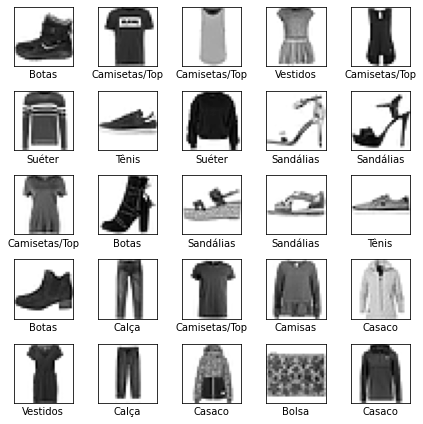

In [5]:
#atribuindo classes
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']
# lendo imagens
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.tight_layout()

**TESTE/TREINAMENTO**

In [6]:
 #Treino, teste e validação
 trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
 testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
 trainX = trainX.astype('float32') / 255.0
 testX = testX.astype('float32') / 255.0

In [7]:
 lb = LabelBinarizer()
 trainY = lb.fit_transform(trainY)
 testY = lb.transform(testY)

**MODELO**

In [14]:
 #Aplicando Dense + Dropout
 model = Sequential()
 model.add(Dense(200, input_shape=(784,), activation='relu'))
 model.add(Dropout(0.20))
 model.add(Dense(100, activation='relu'))
 model.add(Dropout(0.10))
 model.add(Dense(50, activation='relu'))
 model.add(Dropout(0.05))
 model.add(Dense(10, activation='softmax'))
 
 print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [15]:
 sgd = SGD(0.01)
 model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
 H = model.fit(trainX, trainY, validation_split=0.3,epochs=50, batch_size=128)

Epoch 1/50
329/329 [==============================] - 2s 6ms/step - loss: 1.5621 - accuracy: 0.4563 - val_loss: 0.9526 - val_accuracy: 0.6524
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.9505 - accuracy: 0.6532 - val_loss: 0.7454 - val_accuracy: 0.7114
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.8035 - accuracy: 0.7071 - val_loss: 0.6547 - val_accuracy: 0.7676
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.7200 - accuracy: 0.7436 - val_loss: 0.6171 - val_accuracy: 0.7779
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6654 - accuracy: 0.7650 - val_loss: 0.5696 - val_accuracy: 0.7924
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6253 - accuracy: 0.7792 - val_loss: 0.5347 - val_accuracy: 0.8141
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.5943 - accuracy: 0.7924 - val_loss: 0.5178 - val_accuracy: 0.8191
Epoch 

In [11]:
 predictions = model.predict(testX, batch_size=128)
 print(classification_report(testY.argmax(axis=1),
     predictions.argmax(axis=1),
     target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.80      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.77      0.80      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.70      0.60      0.65      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



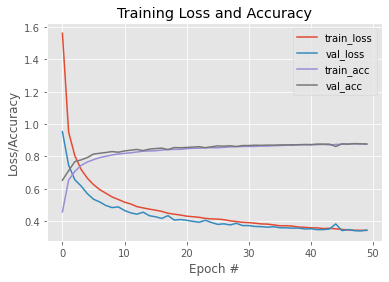

In [17]:
 #Loss and Accuracy
 plt.style.use('ggplot')
 plt.figure()
 plt.plot(H.history['loss'], label='train_loss')
 plt.plot(H.history['val_loss'], label='val_loss')
 plt.plot(H.history['accuracy'], label='train_acc')
 plt.plot(H.history['val_accuracy'], label='val_acc')
 plt.title('Training Loss and Accuracy')
 plt.xlabel('Epoch #')
 plt.ylabel('Loss/Accuracy')
 plt.legend()

#**FINE TUNIG**

In [18]:
 #Aplicando Dense + Dropout
 model = Sequential()
 model.add(Dense(300, input_shape=(784,), activation='relu'))
 model.add(Dropout(0.30))
 model.add(Dense(200, activation='relu'))
 model.add(Dropout(0.25))
 model.add(Dense(250, activation='relu'))
 model.add(Dropout(0.20))
 model.add(Dense(100, activation='relu'))
 model.add(Dropout(0.15))
 model.add(Dense(150, activation='relu'))
 model.add(Dropout(0.10))
 model.add(Dense(50, activation='relu'))
 model.add(Dropout(0.05))
 model.add(Dense(10, activation='softmax'))
 
 print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               60200     
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 250)               50250     
                                                                 
 dropout_11 (Dropout)        (None, 250)               0         
                                                                 
 dense_15 (Dense)            (None, 100)              

In [19]:
 sgd = SGD(0.01)
 model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
 H = model.fit(trainX, trainY, validation_split=0.3,epochs=100, batch_size=128)

Epoch 1/100
329/329 [==============================] - 3s 6ms/step - loss: 2.1101 - accuracy: 0.2165 - val_loss: 1.4309 - val_accuracy: 0.5211
Epoch 2/100
329/329 [==============================] - 2s 5ms/step - loss: 1.3295 - accuracy: 0.4653 - val_loss: 0.9872 - val_accuracy: 0.5922
Epoch 3/100
329/329 [==============================] - 2s 6ms/step - loss: 1.0645 - accuracy: 0.5730 - val_loss: 0.8455 - val_accuracy: 0.6300
Epoch 4/100
329/329 [==============================] - 2s 6ms/step - loss: 0.9369 - accuracy: 0.6237 - val_loss: 0.7586 - val_accuracy: 0.6848
Epoch 5/100
329/329 [==============================] - 2s 5ms/step - loss: 0.8552 - accuracy: 0.6685 - val_loss: 0.7140 - val_accuracy: 0.7116
Epoch 6/100
329/329 [==============================] - 2s 6ms/step - loss: 0.8033 - accuracy: 0.6895 - val_loss: 0.6552 - val_accuracy: 0.7528
Epoch 7/100
329/329 [==============================] - 2s 6ms/step - loss: 0.7574 - accuracy: 0.7110 - val_loss: 0.6200 - val_accuracy: 0.7634

In [20]:
 predictions = model.predict(testX, batch_size=128)
 print(classification_report(testY.argmax(axis=1),
     predictions.argmax(axis=1),
     target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.86      0.72      0.79      1000
           3       0.86      0.91      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.97      0.96      1000
           6       0.62      0.77      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



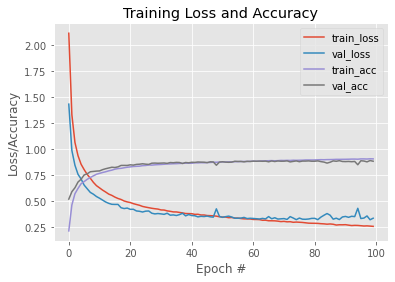

In [21]:
 #Loss and Accuracy
 plt.style.use('ggplot')
 plt.figure()
 plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
 plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
 plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
 plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
 plt.title('Training Loss and Accuracy')
 plt.xlabel('Epoch #')
 plt.ylabel('Loss/Accuracy')
 plt.legend()